In [1]:
# Libraries to help with reading and manipulating data
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)


In [2]:
#read the CSV and putting the data into dataframe 
df = pd.read_csv("../../data/KickStarterProjects.csv")  
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)


There are 378661 rows and 14 columns.


,id,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
99838,1506962323,2018 Comic Con/ Horror Con/ GMCC,Art,Art,USD,10-10-2017,600.0,31-08-2017 04:05,600.00,successful,4,US,600.00,600.00
15731,1079621785,Ixion's The Four Disgracers,Theater,Theater,USD,26-04-2014,3500.0,27-03-2014 20:21,2920.00,failed,54,US,2920.00,3500.00
339459,799118140,Irving Comics Inc. (Canceled),Comics,Comics,USD,16-04-2015,10000.0,17-03-2015 20:58,75.00,canceled,1,US,75.00,10000.00
100211,1508896926,Breakaway,Shorts,Film & Video,USD,17-10-2011,5000.0,16-09-2011 20:11,5365.00,successful,60,US,5365.00,5000.00
170820,1869016023,the Atomic Café Mobile,Drinks,Food,USD,19-06-2015,5000.0,20-05-2015 10:47,5111.06,successful,53,US,5111.06,5000.00
75113,1382708884,Shaken,Dance,Dance,USD,11-04-2011,2000.0,11-03-2011 05:13,2615.00,successful,51,US,2615.00,2000.00
258934,386894220,Happiness Ambassador Postcard Project Year: 20...,Mixed Media,Art,USD,29-09-2012,800.0,15-09-2012 01:29,80.00,failed,3,US,80.00,800.00
178566,19084902,Unlikely Friends (Short Film),Drama,Film & Video,GBP,13-03-2015,150.0,03-02-2015 09:49,5.00,failed,1,GB,7.39,221.71
33859,1171932479,Would you help a MONSTER make music? Yes or No?,Classical Music,Music,USD,21-09-2014,2000.0,22-08-2014 18:01,2778.00,successful,30,US,2778.00,2000.00
278069,484824490,Dracula: Son of the Dragon,Comics,Comics,USD,17-04-2013,14000.0,18-03-2013 16:54,15172.66,successful,329,US,15172.66,14000.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 28.9+ MB


### Q:1 .Read the data into a pandas dataframe and drop the ‘currency’ and ‘goal’ columns.

In [4]:
df1 = pd.read_csv("../../data/KickStarterProjects.csv")  
df1.drop(['currency','goal'], axis = 1, inplace = True)
df1.shape

(378661, 12)

### Q2 How many columns in the dataset contain missing values?

In [5]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

name                4
id                  0
subcategory         0
category            0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### Q3 If there are any missing values in the dataframe, drop the rows that contain missing values before moving ahead, and use this dataframe for subsequent questions.
### How many unique project states are there in the data and which among them is the most frequent?


In [6]:
## Droping the rows which is missing values
df.dropna(inplace=True)
df['state'].nunique()
df['state'].value_counts()

print(f'unique project states: {df["state"].nunique()}' )
print(f'unique project count:\n {df["state"].value_counts()}' )



unique project states: 6
unique project count:
 failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64


### Q-4 Which of the following values (respectively) are the closest approximation of the mean and median number of backers the projects in the dataset have been able to secure?

In [7]:
print('Mean:',df.backers.mean(), '\tMedian:', df.backers.median())


Mean: 105.61854395930882 	Median: 12.0


### Q-5 Are there any indications that the number of backers have extreme values?

Mean: 105.61747578969052 	Median: 12.0 both have a good difference that means it has outliers


In [8]:
#convert the object type into the catagory all at once
for colname in df.columns[df.dtypes == 'object']:
    df[colname] = df[colname].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                378657 non-null  int64   
 1   name              378657 non-null  category
 2   subcategory       378657 non-null  category
 3   category          378657 non-null  category
 4   currency          378657 non-null  category
 5   deadline          378657 non-null  category
 6   goal              378657 non-null  float64 
 7   launched          378657 non-null  category
 8   pledged           378657 non-null  float64 
 9   state             378657 non-null  category
 10  backers           378657 non-null  int64   
 11  country           378657 non-null  category
 12  usd_pledged_real  378657 non-null  float64 
 13  usd_goal_real     378657 non-null  float64 
dtypes: category(8), float64(4), int64(2)
memory usage: 37.0 MB


In [9]:
df.nunique()

id                  378657
name                375722
subcategory            159
category                15
currency                14
deadline              3164
goal                  8353
launched            347031
pledged              62130
state                    6
backers               3963
country                 23
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

### Q-6 The goal amount in USD has a highly skewed distribution. Please apply min-max scaling to this column and confirm if that helped in reducing the skewness.

<AxesSubplot:xlabel='usd_goal_real_mm_sc', ylabel='Count'>

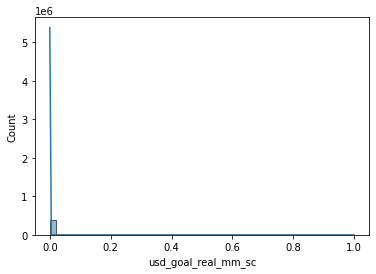

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df['usd_goal_real_mm_sc'] = MinMaxScaler().fit_transform(df[['usd_goal_real']])
sns.histplot(df['usd_goal_real_mm_sc'], bins=50, kde=True)



<AxesSubplot:xlabel='usd_goal_real_std_sc', ylabel='Count'>

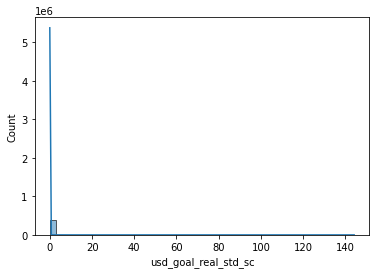

In [11]:
df['usd_goal_real_std_sc'] = StandardScaler().fit_transform(df[['usd_goal_real']])
sns.histplot(df['usd_goal_real_std_sc'], bins=50, kde=True)

### Q7 Which of these plots represent the 'usd_goal_real' column after applying log transformation to this column?

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

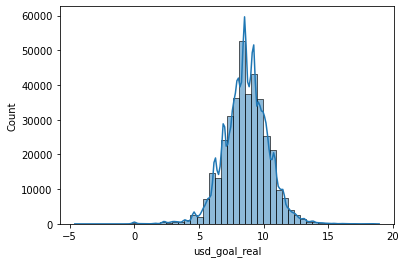

In [12]:
sns.histplot(np.log(df['usd_goal_real']), bins=50, kde=True)

### Q8 In which month was the highest number of projects launched?

In [13]:
# adding in a feature that's just the month
df['launch_month'] = pd.to_datetime(df['launched']).dt.month 
df['launch_month'].value_counts().sort_values(ascending = False)




7     34477
1     34346
10    33409
3     32837
11    32135
8     31619
5     31573
9     31538
6     31381
4     31038
2     29876
12    24428
Name: launch_month, dtype: int64

### Q8 In which Year was the highest number of projects launched?


In [14]:
df['launch_year'] = pd.to_datetime(df['launched']).dt.year
df['launch_year'].value_counts().sort_values(ascending=False)


2015    77300
2014    67745
2016    57183
2017    52200
2013    44851
2012    41163
2011    26236
2010    10519
2009     1329
2018      124
1970        7
Name: launch_year, dtype: int64

### Which of the following project categories has been able to raise the most funds on average?

In [15]:
df['category'].nunique()
df['category'].value_counts().sort_values(ascending=False)


Film & Video    63584
Music           51918
Publishing      39874
Games           35230
Technology      32569
Design          30069
Art             28152
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: category, dtype: int64

In [16]:
df.groupby(['category']).mean().sort_values(by='usd_pledged_real', ascending=False)

,id,goal,pledged,backers,usd_pledged_real,usd_goal_real,usd_goal_real_mm_sc,usd_goal_real_std_sc,launch_month,launch_year
category,,,,,,,,,,
Design,1.078315e+09,46735.101331,27120.653196,241.307659,24417.846732,41872.697959,0.000252,-0.003106,6.537131,2014.853138
Technology,1.071495e+09,119712.316780,22586.164814,164.466609,21151.171165,102288.542838,0.000615,0.049294,6.532193,2015.097485
Games,1.072141e+09,50712.680988,21865.788251,321.794408,21042.491442,44924.925023,0.000270,-0.000459,6.367641,2014.818280
Comics,1.063611e+09,20243.646297,6899.311189,134.771236,6610.443828,19571.430669,0.000118,-0.022449,6.191885,2014.462612
Film & Video,1.074955e+09,84332.190562,6362.832348,66.016230,6158.073703,82623.446274,0.000497,0.032238,6.338670,2013.557656
Fashion,1.069690e+09,24818.246005,6549.031814,61.447800,5712.450839,22412.409361,0.000135,-0.019985,6.508327,2014.781995
Food,1.081894e+09,48693.745411,5340.163268,54.172466,5113.669716,49039.620802,0.000295,0.003110,6.491139,2014.584952
Theater,1.068349e+09,27542.345424,4097.224679,47.057271,4005.918099,27088.321275,0.000163,-0.015929,6.184459,2013.492990
Music,1.074995e+09,16056.357380,3992.735602,52.168323,3858.367608,15372.161844,0.000092,-0.026091,6.318156,2013.594611


### Q10  Are there any duplicates in the project names?

In [17]:
df['name'].nunique()
df['name'].value_counts().sort_values(ascending=False)


#NAME?                                                          43
New EP/Music Development                                        41
Canceled (Canceled)                                             13
N/A (Canceled)                                                  11
Music Video                                                     11
                                                                ..
warbird photography calendar 2016                                1
wardrobe                                                         1
wargaming scenery and terrain                                    1
warmpod.com                                                      1
€9 Universal Remote Control App for kid mum dad grandparents     1
Name: name, Length: 375722, dtype: int64

In [18]:
df['name'].value_counts(dropna = False)

#NAME?                                                          43
New EP/Music Development                                        41
Canceled (Canceled)                                             13
N/A (Canceled)                                                  11
Music Video                                                     11
                                                                ..
Games To Go                                                      1
Games To Canvas                                                  1
Games That Teach You To Program (Canceled)                       1
Games Save the World                                             1
€9 Universal Remote Control App for kid mum dad grandparents     1
Name: name, Length: 375722, dtype: int64

In [19]:
data= [2, 5, 12, 15, 19, 4, 6, 11, 16, 18, 12, 12, 42, 6, 56, 34, 23, 11]

np.quantile(data,[0.25,0.75])


array([ 7.25, 18.75])